# Stroke Prediction

Table of Contents:
1. [Importing Libraries](#1) <a href= "1"></a>
2. [Importing Dataset](#2) <a href= "2"></a>
3. [Data Visualization](#3) <a href= "3"></a> <br> 
    3.1. [Heat Map Correlation](#3.1) <a href= "3.1"></a> <br>
    3.2. [Count Plot](#3.2) <a href= "3.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Gender](#3.2.1) <a href= "3.2.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Hypertension](#3.2.2) <a href= "3.2.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; c. [Marriage Status](#3.2.3) <a href= "3.2.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; d. [Work Type](#3.2.4) <a href= "3.2.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; e. [Residence Type](#3.2.5) <a href= "3.2.5"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; f. [Smoking Status](#3.2.6) <a href= "3.2,6"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; g. [Stroke](#3.2.7) <a href= "3.2.7"></a> <br>
    3.3 [Distribution Plot](#3.3) <a href= "3.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Avg. Glucose Level](#3.3.1) <a href= "3.3.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [BMI](#3.3.2) <a href= "3.3.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; c. [No Stroke vs Stroke by BMI](#3.3.3) <a href= "3.3.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; d. [No Stroke vs Stroke by Avg. Glucose Level](#3.3.4) <a href= "3.3.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; e. [No Stroke vs Stroke by Age](#3.3.5) <a href= "3.3.5"></a> <br>
    3.4 [Scatter Plot](#3.4) <a href= "3.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Age vs BMI](#3.4.1) <a href= "3.4.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Age vs Avg. Glucose Level](#3.4.2) <a href= "3.4.2"></a> <br>
    3.5 [Cat Plot](#3.5) <a href= "3.5"></a> <br>
    3.6 [Pair Plot](#3.6) <a href= "3.6"></a> <br>
4. [Data Preprocessing](#4) <a href= "4"></a> <br>
5. [Encoding](#5) <a href= "5"></a> <br>
    5.1 [Categorical Encoding](#5.1) <a href= "5.1"></a> <br>
    5.2 [Label Encoding](#5.2) <a href= "5.2"></a> <br>
6. [Splitting the dataset into the Training set and Test set](#6) <a href= "6"></a> <br> 
7. [Feature Scaling](#7) <a href= "7"></a> <br>
8. [Handling Imbalance data using SMOTE](#8) <a href= "8"></a> <br>
9. [Model Selection](#9) <a href= "9"></a> <br>
10. [Tuning the Models](#10) <a href= "10"></a> <br>
11. [Models after Tuning Hyperparameters](#11) <a href= "11"></a> <br>
    11.1 [RandomForest](#11.1) <a href= "11.1"></a> <br>
    11.2 [XGBoost](#11.2) <a href= "11.2"></a> <br>
12. [Keras ANN](#12) <a href= "12"></a> <br>
    12.1 [Building the ANN](#12.1) <a href= "12.1"></a> <br>
    12.2 [Evaluating the ANN (Cross Validation)](#12.2) <a href= "12.2"></a> <br>
    12.3 [Tuning the ANN](#12.3) <a href= "12.3"></a> <br>
    12.4 [ANN Model after Tuning](#12.4) <a href= "12.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Loss Graph](#12.4.1) <a href= "12.4.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Accuracy Graph](#12.4.2) <a href= "12.4.2"></a> <br>
13. [Conclusion](#13) <a href= "13"></a> <br>

In [50]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Let's Start!

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Libraries** <a id="1"></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importing Dataset** <a id="2"></a>

In [5]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are null values present in 'bmi'.**

In [8]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

**We replaced null values of 'bmi' with mean in that column.**

In [10]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [11]:
dataset.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

In [17]:
selected_columns = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
subset_dataset = dataset[selected_columns]

# Tính toán ma trận tương quan
correlation_matrix = subset_dataset.corr()
correlation_matrix

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002999  0.325942      0.160189       0.038899   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.002999  0.006388  
age                         0.238171  0.325942  0.245257  
hypertension                0.174474  0.160189  0.127904  
heart_disease               0.161857  0.038899  0.134914  
avg_glucose_level           1.000000  0.168751  0.131945  
bmi                         0.168751  1.000000  0.038947  
stroke                      0.131945  0.038947  1.000000

# **Data Visualization** <a id="3"></a>

## **Heat Map Correlation** <a id="3.1"></a>

<Axes: >

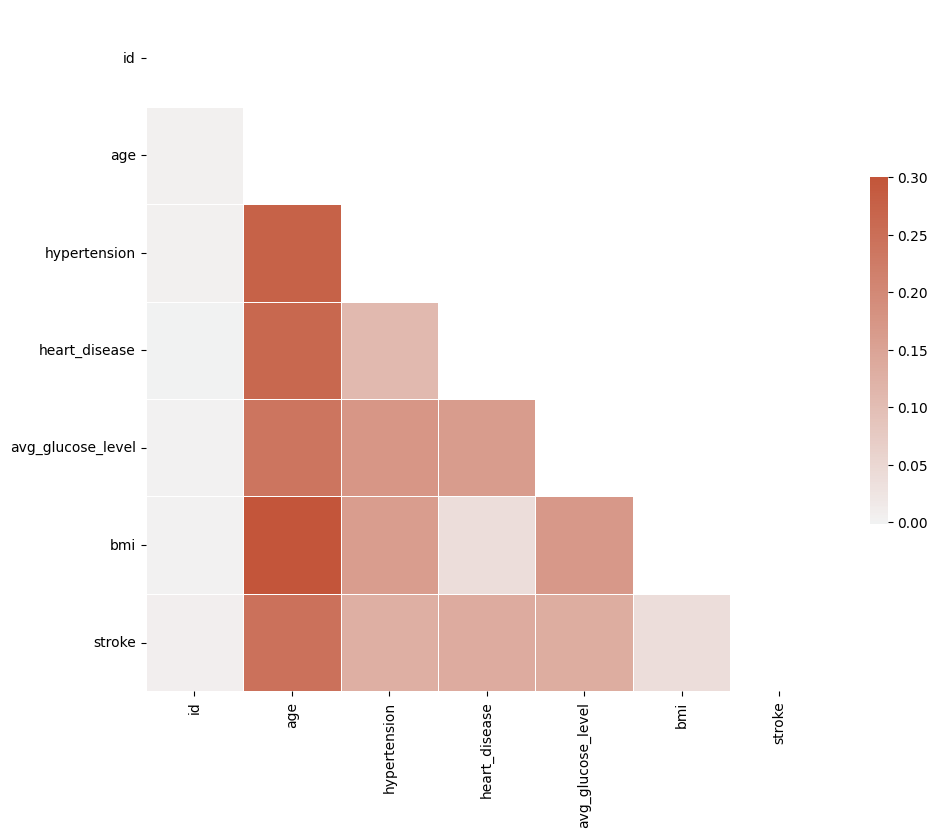

In [19]:
# Compute the correlation matrix
corr = subset_dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## **Count Plot** <a id="3.2"></a>

### **Gender** <a id="3.2.1"></a>

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


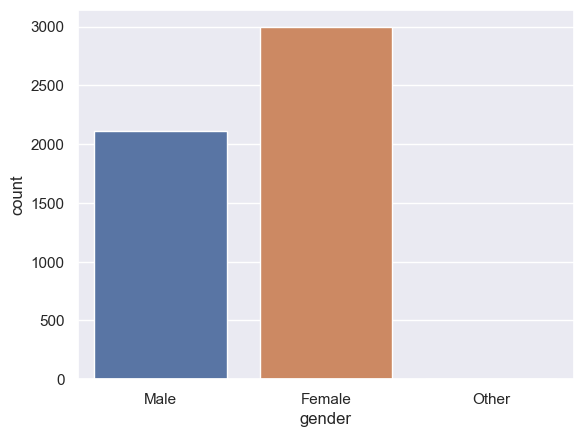

In [22]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

*Above, you can see the Females present in our dataset is higher than males.*

### **Hypertension** <a id="3.2.2"></a>

hypertension
0    4612
1     498
Name: count, dtype: int64


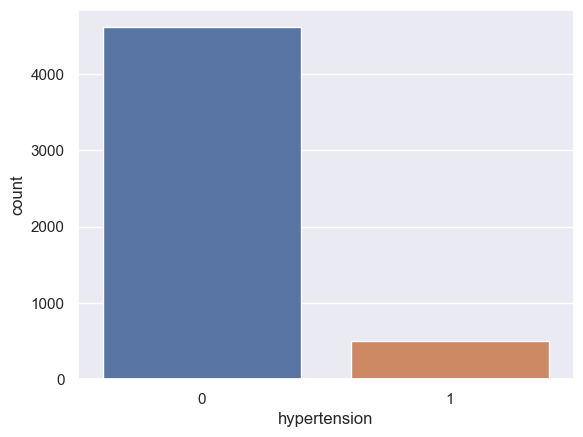

In [23]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

*From above, it shows that less people are suffering from hypertension.*

### **Marriage Status** <a id="3.2.3"></a>

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


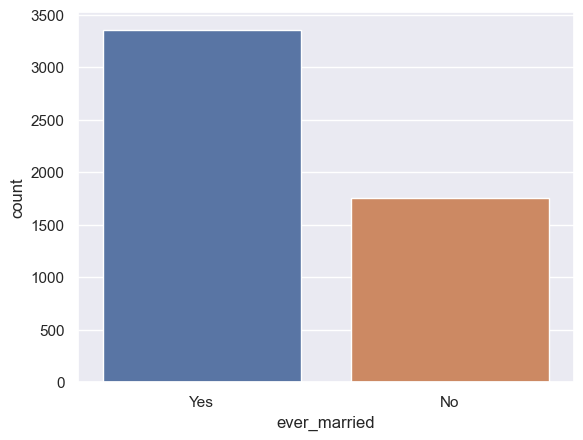

In [24]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

*The ratio can seen from above is around 2:1 for being ever married.*

### **Work Type** <a id="3.2.4"></a>

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


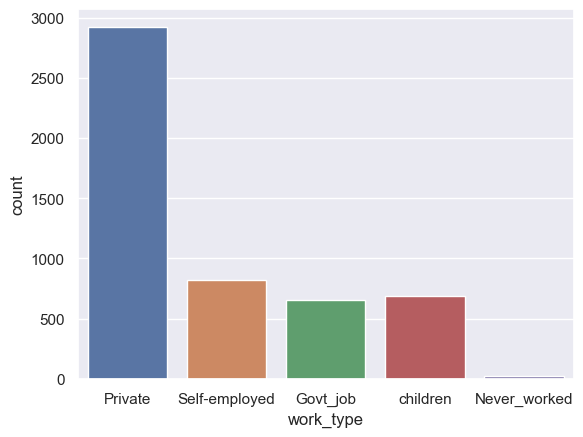

In [25]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

*A lot of people works in Private sector.*

### **Residence Type** <a id="3.2.5"></a>

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


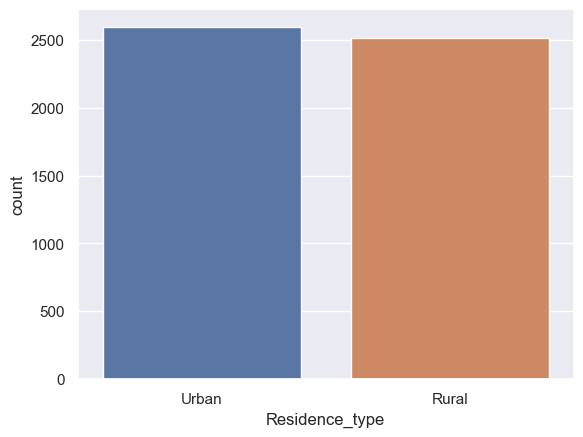

In [26]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

*The residence type is same for people present in our dataset.*

### **Smoking Status** <a id="3.2.6"></a>

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


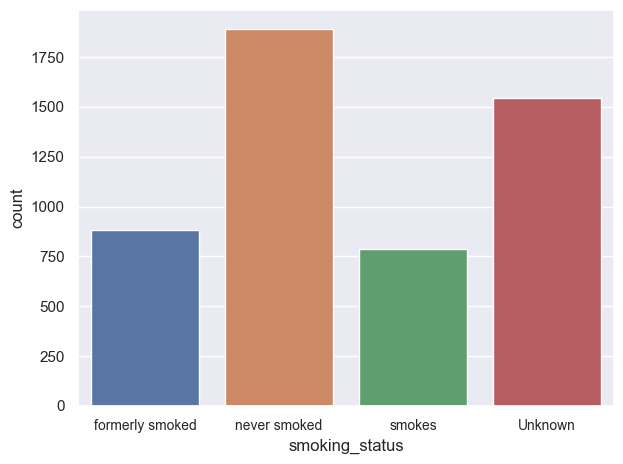

In [27]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

*A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.*

### **Stroke** <a id="3.2.7"></a>

stroke
0    4861
1     249
Name: count, dtype: int64


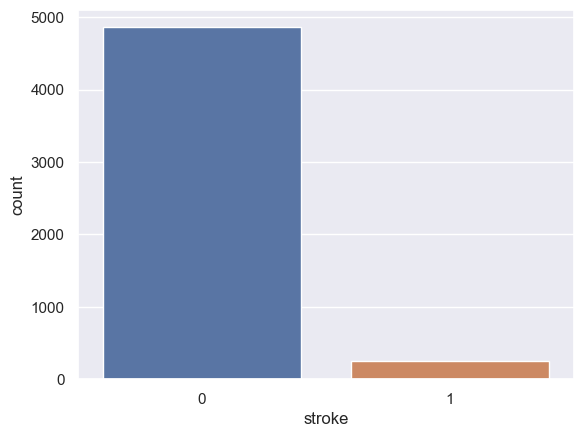

In [28]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

*From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance.*

*But, first let's plot more to see how our data does in this state.*

## **Distribution Plot** <a id="3.3"></a>

### **Avg. Glucose Level** <a id="3.3.1"></a>

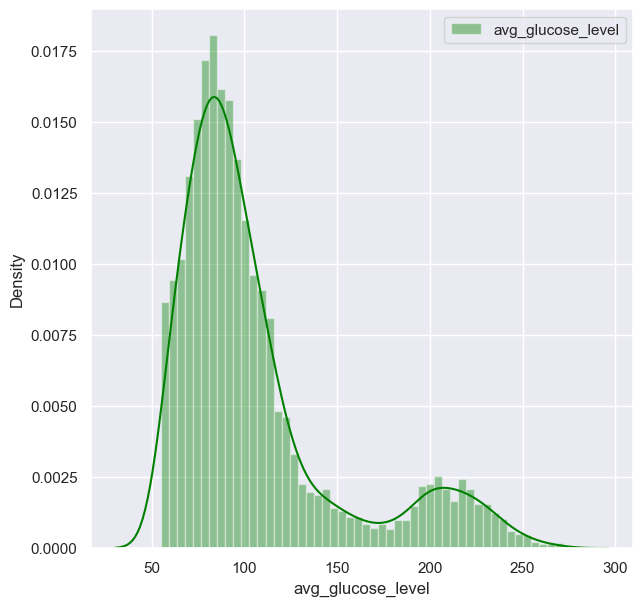

In [29]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

*1. The normal glucose levels in adults should be around 80-140. Therefore, the density is higher around that range. So, we can see that the we have lot of people who have normal glucose level, so they are not suffering from diabetes.*

*2. The range 140-200 can considered as pre-diabetes. But, looking at graph we can see that less people are in pre-diabetes zone.*

*3. Anything above 200 can be seen that the person is suffering from diabetes. The density is more as compare to pre-diabetes by looking at the graph.*

### **BMI** <a id="3.3.2"></a>

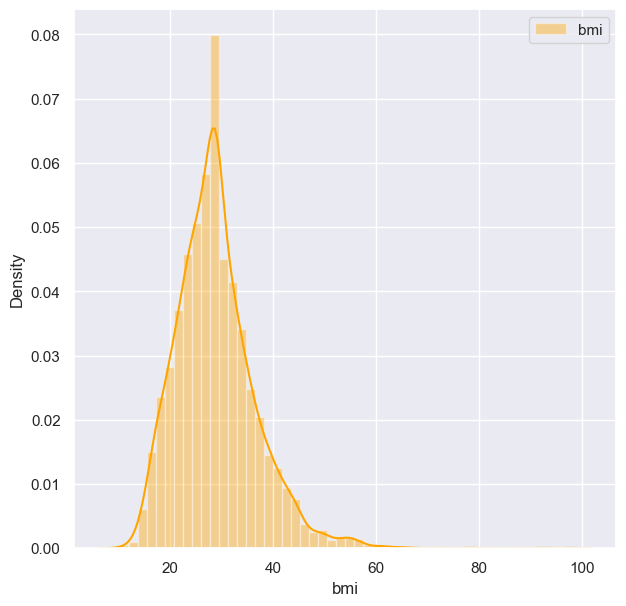

In [30]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

*1. BMI below 19 can be seen as under weight. By looking at our graph, not lot of people are underweight.*

*2. BMI between 19-25 can be seen as normal weight. We have relatively good amount of people who have normal weight.*

*3. BMI higher than 25 can be seen as the person is likely overweight or obese. Our graph shows the density is higher around those BMI.*

### **No Stroke vs Stroke by BMI** <a id="3.3.3"></a>

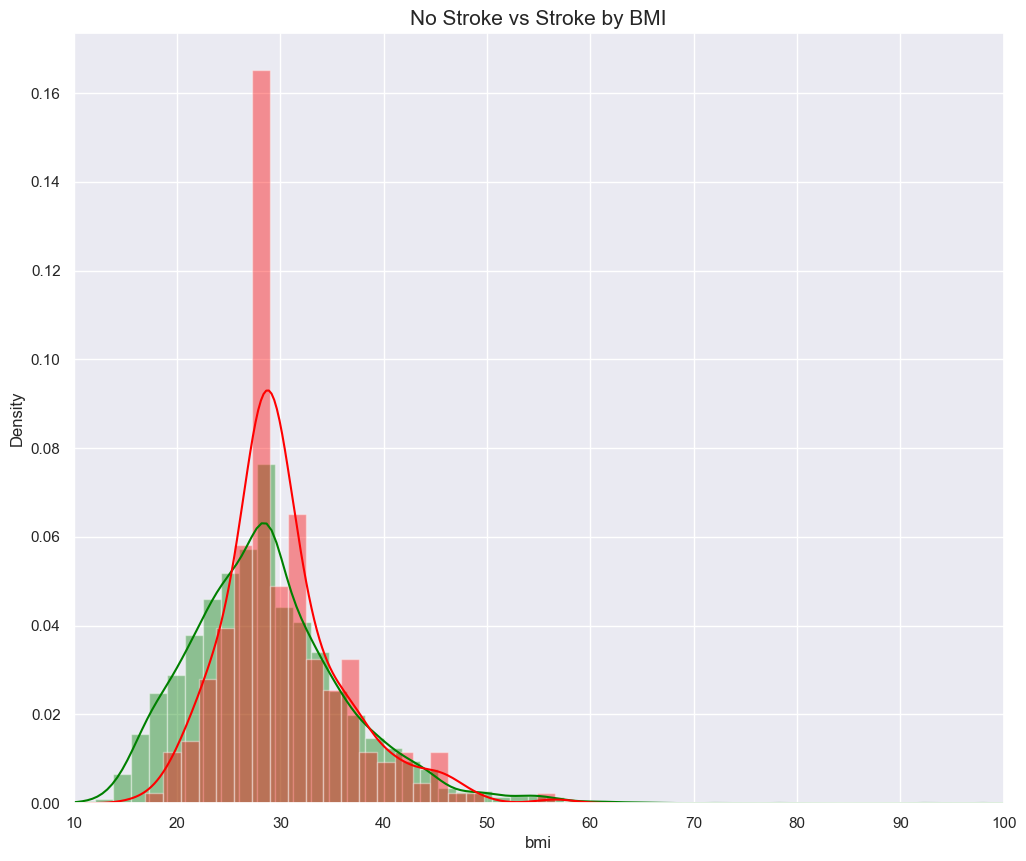

In [31]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

*From the graph, it shows that the density of overweight people who suffered a stroke is more.*

### **No Stroke vs Stroke by Avg. Glucose Level** <a id="3.3.4"></a>

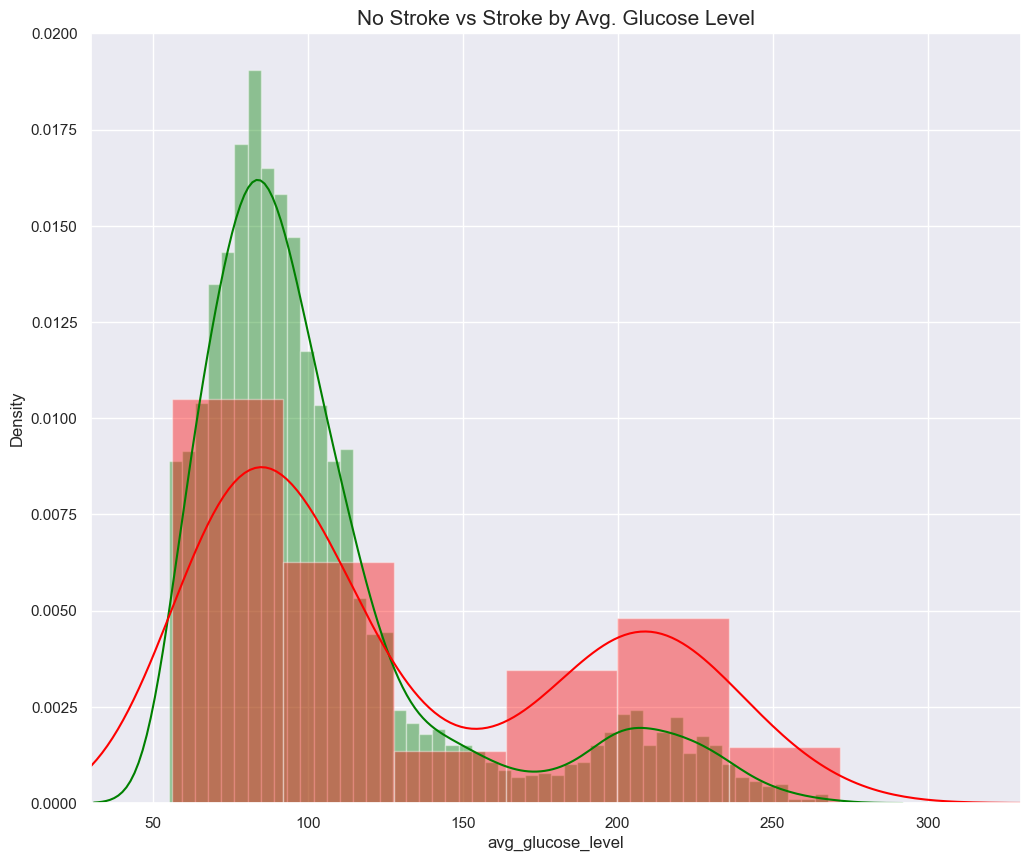

In [32]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

*From graph, it shows that the density of people having glucose level less than 100 suffered stroke more.*

### **No Stroke vs Stroke by Age** <a id="3.3.5"></a>

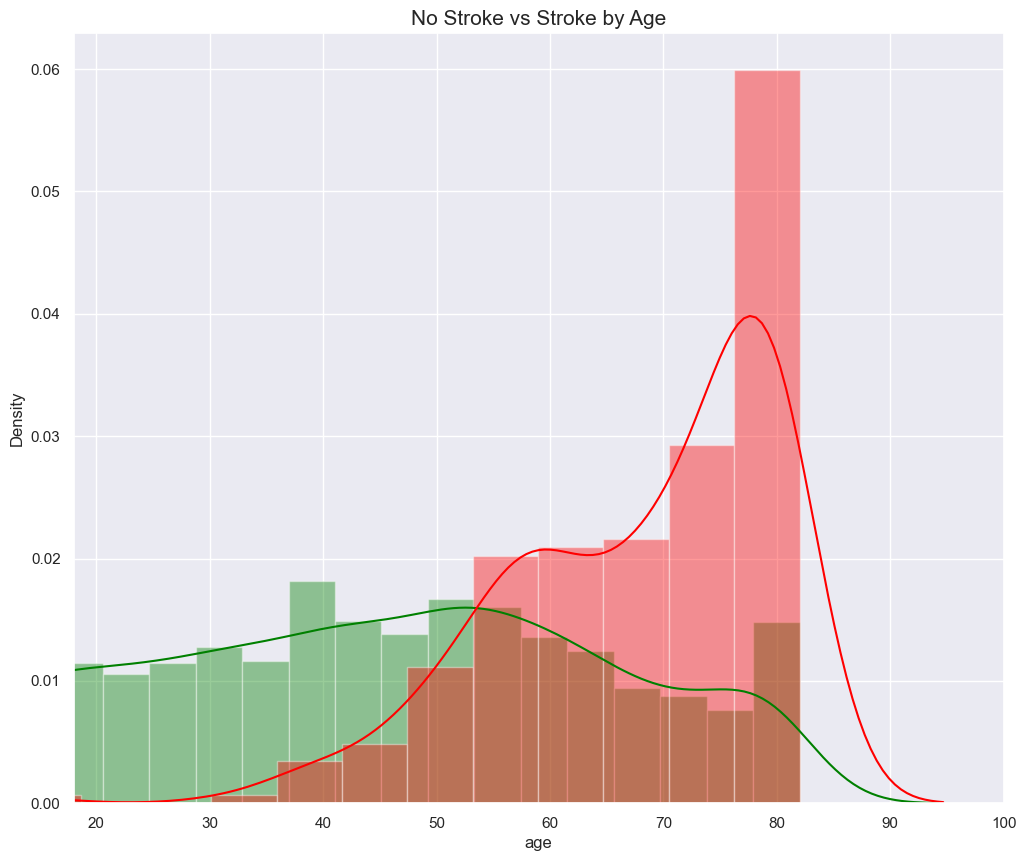

In [33]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

*From graph, it can be seen that the density of people having age above 50 suffered stroke more.*

## **Scatter Plot** <a id="3.4"></a>

### **Age vs BMI** <a id="3.4.1"></a>

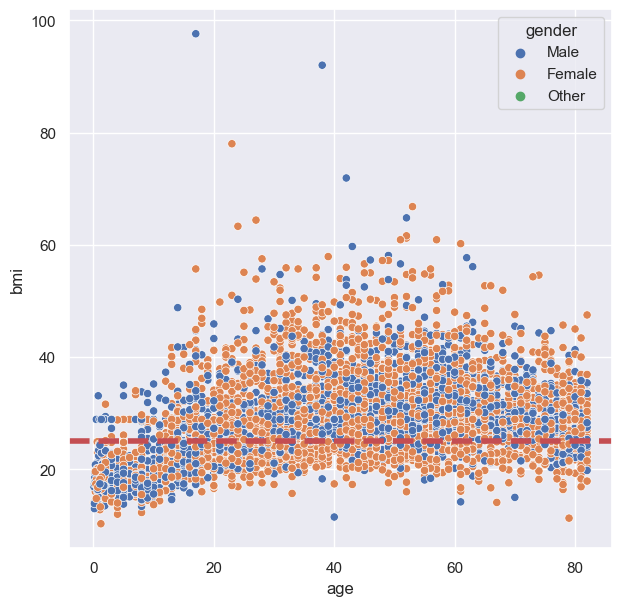

In [34]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that there are lot of people having BMI above 25 are overweight and obese.*

### **Age vs Avg. Glucose Level** <a id="3.4.2"></a>

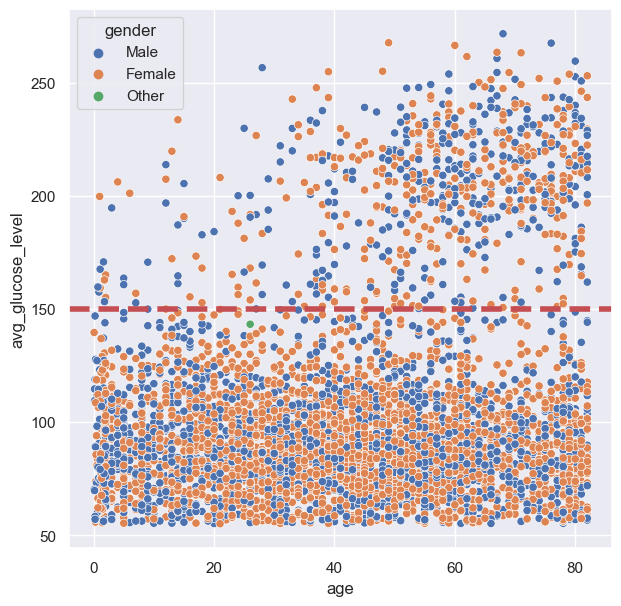

In [35]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.*

## **Violin Plot** <a id="3.5"></a>

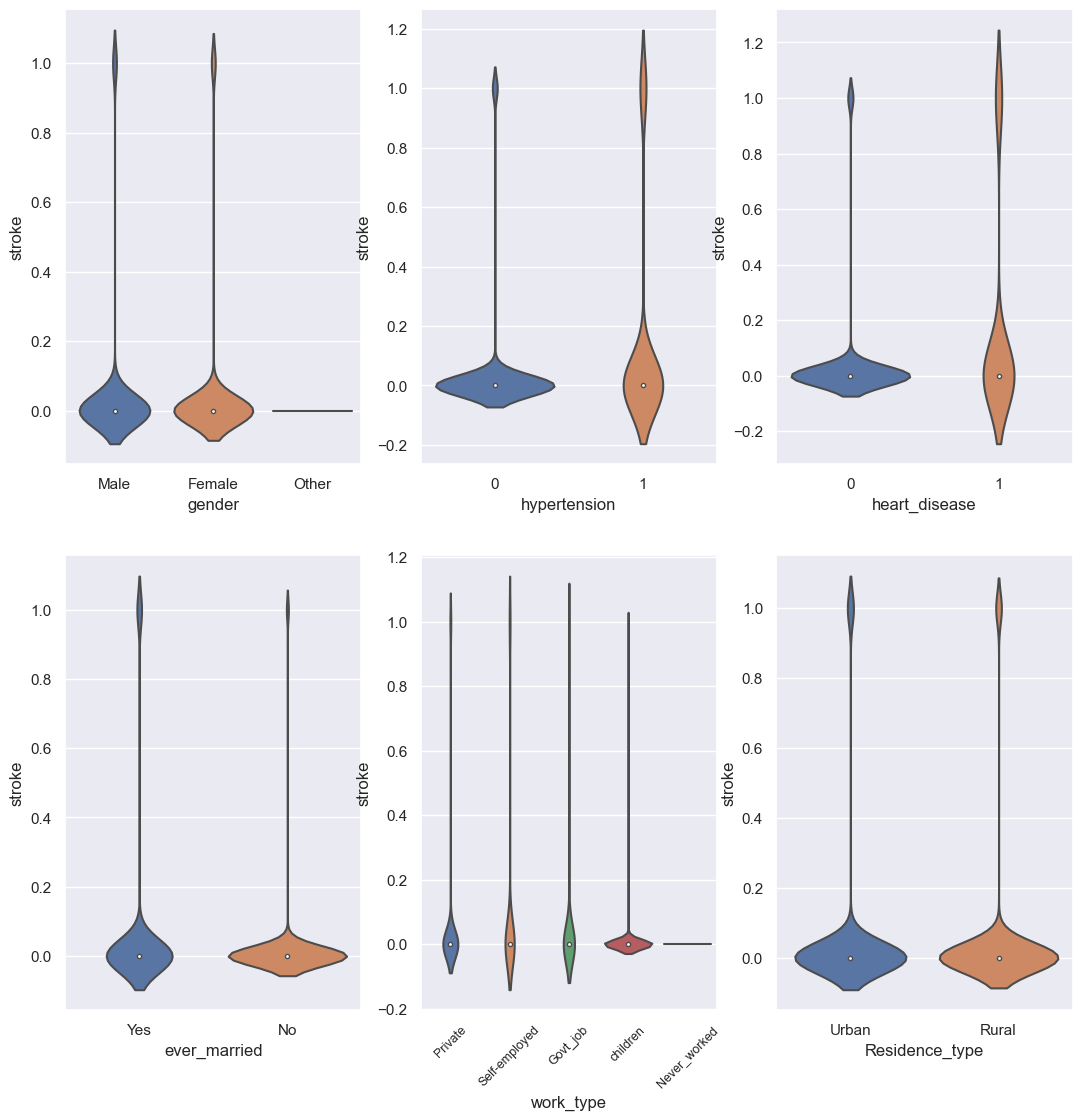

In [36]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
plt.show()

## **Pair Plot** <a id="3.6"></a>

<Figure size 1000x1000 with 0 Axes>

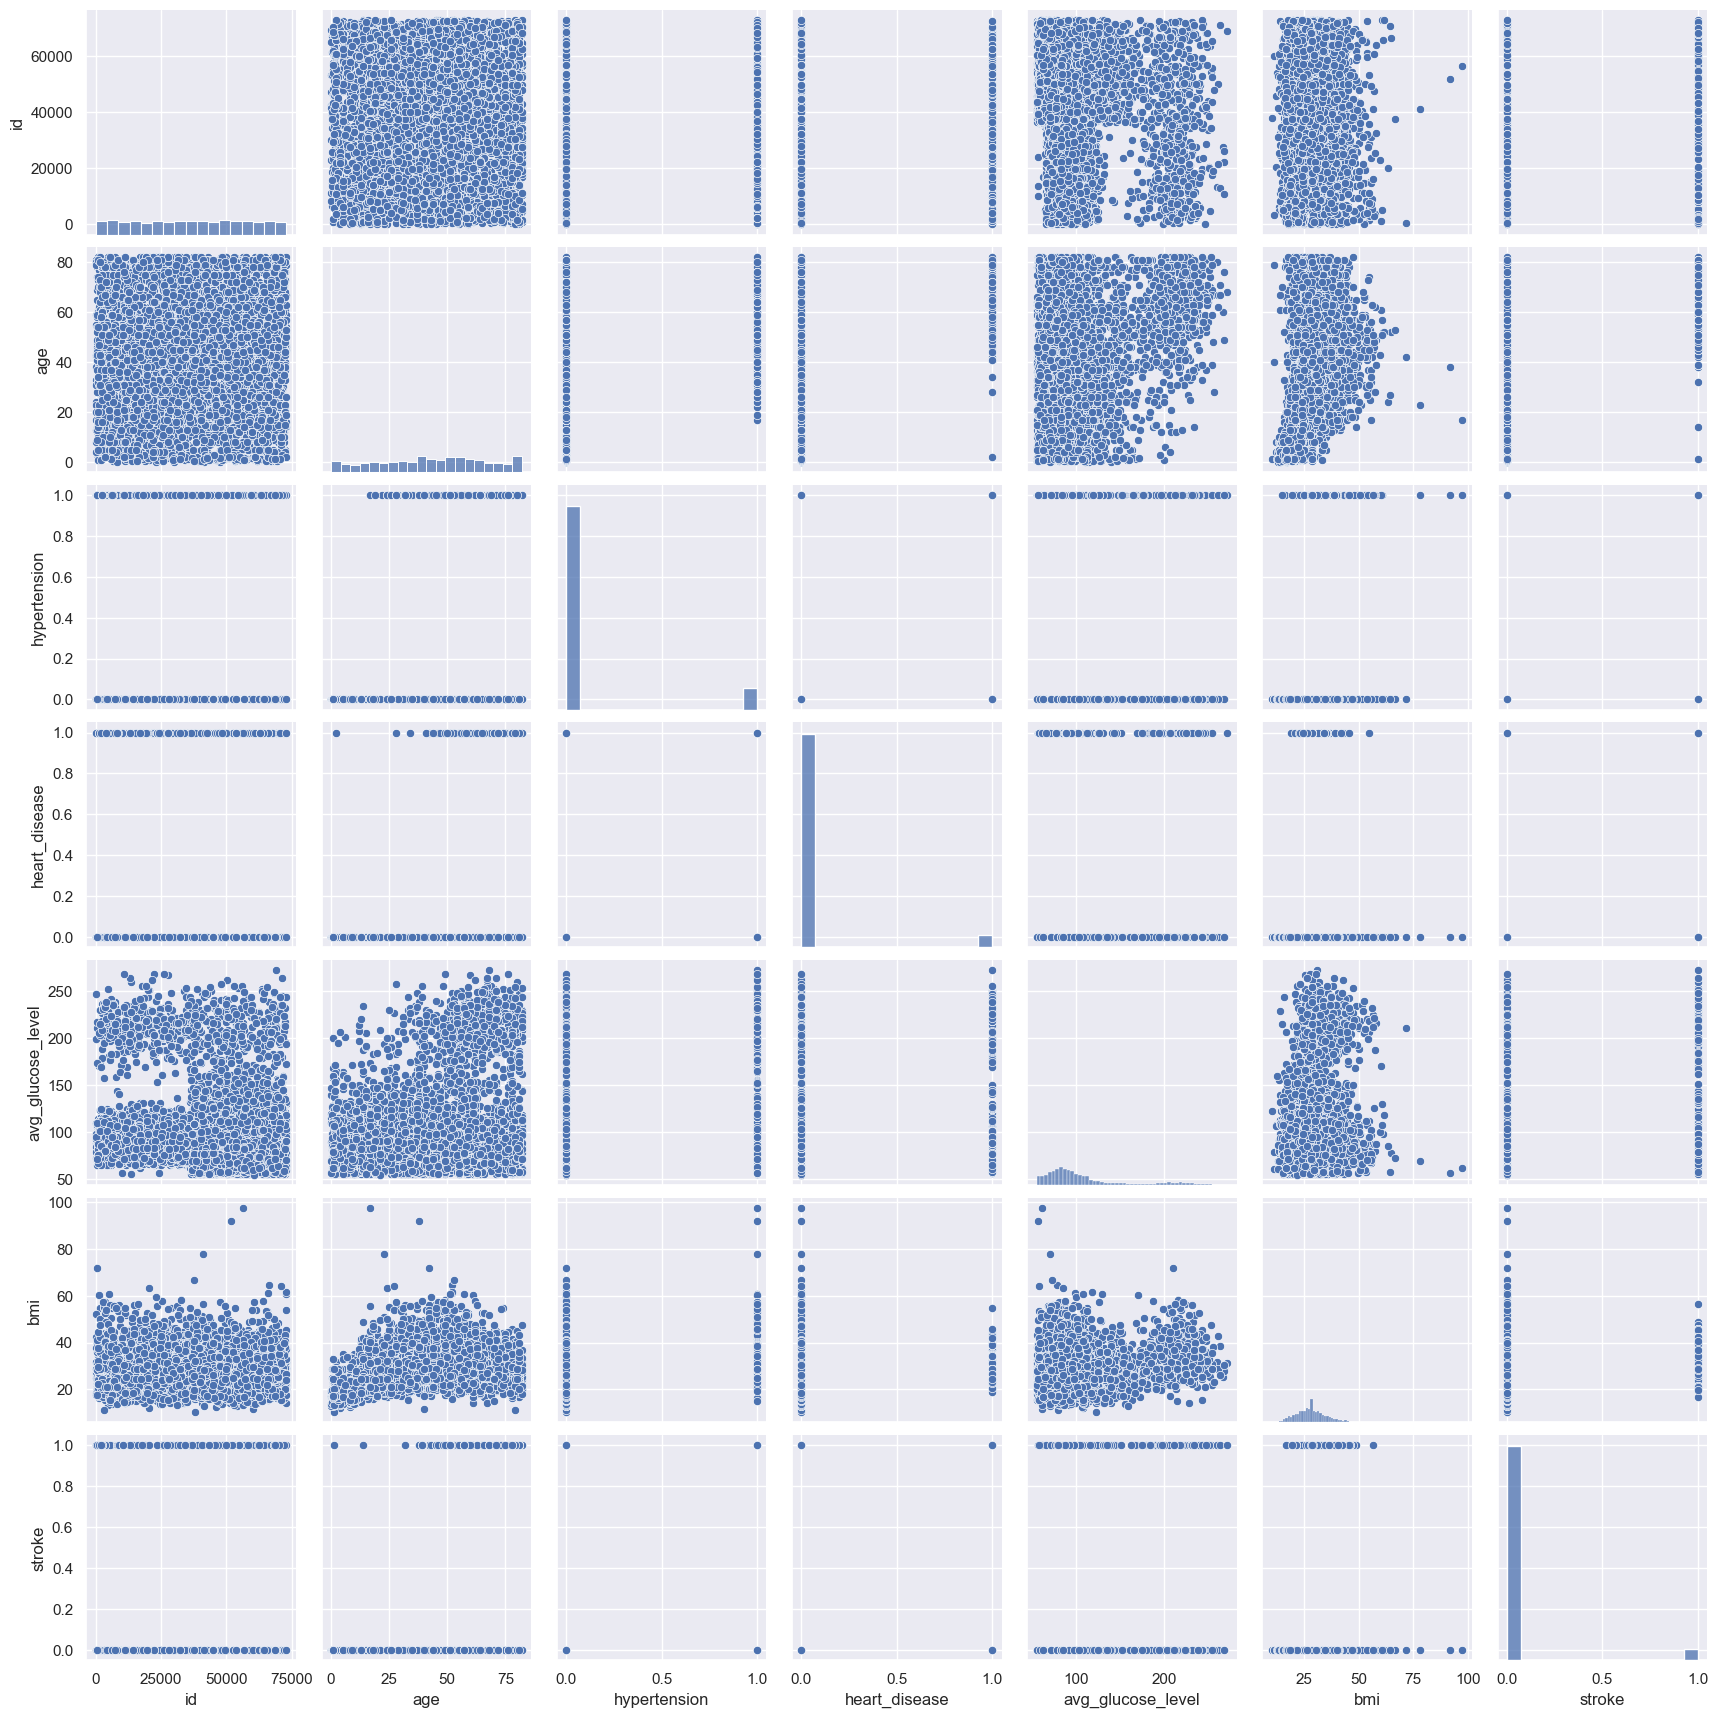

In [37]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

# **Data Preprocessing** <a id="4"></a>

In [38]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [39]:
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.893236911794666,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [40]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Encoding <a id="5"></a>

## **Categorical Encoding** <a id="5.1"></a>

We are using **OneHotEncoder()** to encode the categorical columns: '**gender**', '**work_type**' and '**smoking_status**.

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [42]:
x

array([[0.0, 1.0, 0.0, ..., 'Urban', 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 'Rural', 202.21, 28.893236911794666],
       [0.0, 1.0, 0.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

## Label Encoding <a id="5.2"></a>

We are using **LabelEncoder()** to encode binary columns: '**ever_married**' and '**residence_type**'

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [44]:
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794666],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [45]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (5110, 19)
Shape of Y:  (5110,)


# Splitting the dataset into the Training set and Test set <a id="6"></a>

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [47]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


# Feature Scaling <a id="7"></a>

*StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1.*

In [48]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Handling Imbalance data using SMOTE <a id="8"></a>

*SMOTE - **Synthetic Minority Oversampling Technique** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.*

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


# Model Selection <a id="9"></a>

In [56]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.2/99.8 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.4/99.8 MB 3.7 MB/s eta 0:00:27
   ---------------------------------------- 0.7/99.8 MB 4.3 MB/s eta 0:00:24
   ---------------------------------------- 1.0/99.8 MB 5.0 MB/s eta 0:00:20
    --------------------------------------- 1.4/99.8 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 1.6/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 1.9/99.8 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 5.8 MB/s eta 0:00:17
   - ---------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [61]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[750 218]
 [ 15  39]]
Accuracy Score:  0.7720156555772995

K-Fold Validation Mean Accuracy: 79.45 %

Standard Deviation: 1.39 %

ROC AUC Score: 0.75

Precision: 0.15

Recall: 0.72

F1: 0.25
-----------------------------------

SVM :
[[794 174]
 [ 32  22]]
Accuracy Score:  0.7984344422700587

K-Fold Validation Mean Accuracy: 88.36 %

Standard Deviation: 1.54 %

ROC AUC Score: 0.61

Precision: 0.11

Recall: 0.41

F1: 0.18
-----------------------------------

KNeighbors :
[[837 131]
 [ 36  18]]
Accuracy Score:  0.8365949119373777

K-Fold Validation Mean Accuracy: 90.77 %

Standard Deviation: 0.87 %

ROC AUC Score: 0.60

Precision: 0.12

Recall: 0.33

F1: 0.18
-----------------------------------

GaussianNB :
[[145 823]
 [  2  52]]
Accuracy Score:  0.19275929549902152

K-Fold Validation Mean Accuracy: 57.33 %

Standard Deviation: 0.86 %

ROC AUC Score: 0.56

Precision: 0.06

Recall: 0.96

F1: 0.11
-----------------------------------

BernoulliNB :
[[574 394]
 [  9  4

In [62]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [63]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [64]:
df

Model   Accuracy  K-Fold Mean Accuracy  Std. Deviation  \
7              XGBoost  91.976517             95.107316        3.770300   
6        Random Forest  90.606654             95.967343        1.377559   
5        Decision Tree  86.007828             90.393013        2.936513   
2           KNeighbors  83.659491             90.765631        0.866181   
1                  SVM  79.843444             88.363831        1.536875   
0  Logistic Regreesion  77.201566             79.450089        1.386548   
4          BernoulliNB  60.567515             72.938676        1.593421   
3           GaussianNB  19.275930             57.333590        0.861249   

    ROC AUC  Precision    Recall        F1  
7  0.537994   0.150000  0.111111  0.127660  
6  0.522019   0.096154  0.092593  0.094340  
5  0.515228   0.067961  0.129630  0.089172  
2  0.599001   0.120805  0.333333  0.177340  
1  0.613828   0.112245  0.407407  0.176000  
0  0.748508   0.151751  0.722222  0.250804  
4  0.713154   0.102506  0.833333  0.182556  
3  0.556378   0.059429  0.962963  0.111948

# Tuning the Models <a id="10"></a>

In [65]:
from sklearn.model_selection import GridSearchCV

*The **GridSearchCV** is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.*

In [66]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [67]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 79.45%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 91.92%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC():
Best Accuracy : 88.36%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 57.33%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 72.94%
Best Parameters :  {'alpha': 0.25}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.10%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 95.97%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, ea

*Looking at output after **GridSearch**, we can determine that the **RandomForest** and **XGBoost** seems best fit for the model.*

# Models after Tuning Hyperparameters <a id="11"></a>

*We only see **RandomForest** and **XGBoost** performance as they have high accuracy.*

## RandomForest <a id="11.1"></a>

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.10      0.09      0.09        54

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.90      0.91      0.91      1022

ROC AUC score: 0.7328397612488522
Accuracy Score:  0.9060665362035225


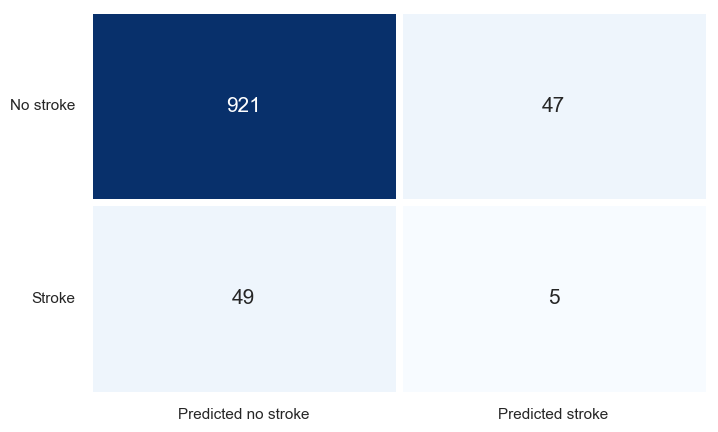

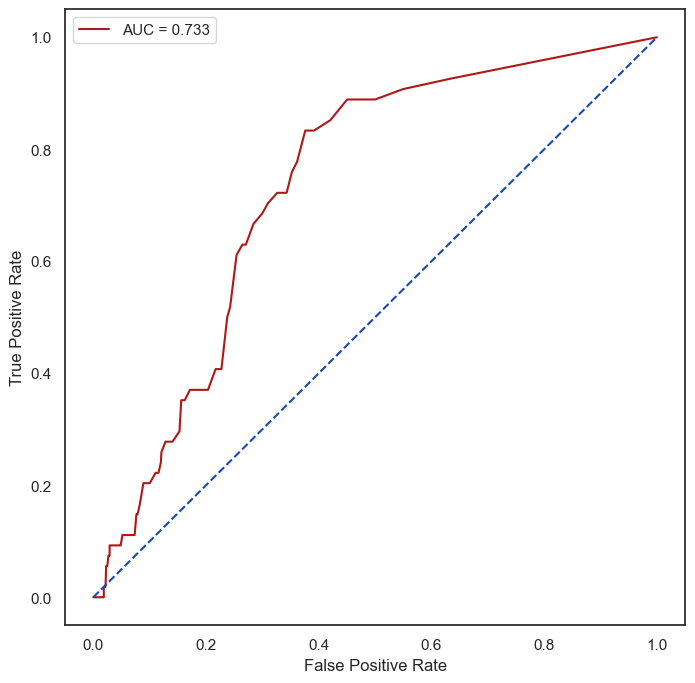

In [68]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## XGBoost <a id="11.2"></a>

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       968
           1       0.16      0.22      0.19        54

    accuracy                           0.90      1022
   macro avg       0.56      0.58      0.57      1022
weighted avg       0.91      0.90      0.91      1022

ROC AUC score: 0.7513965411692685
Accuracy Score:  0.8972602739726028


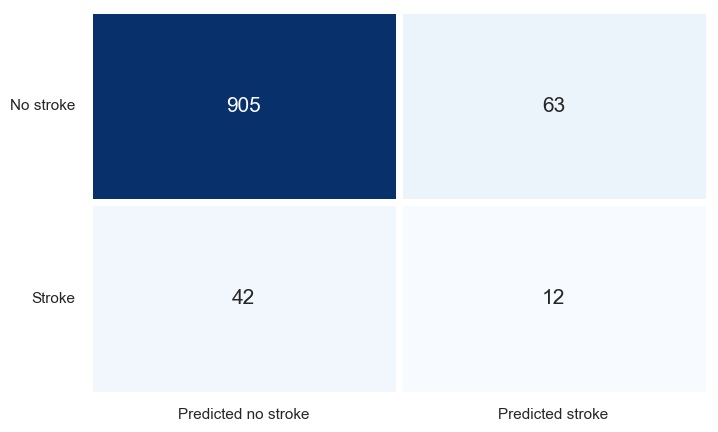

Text(0.5, 0, 'False Positive Rate')

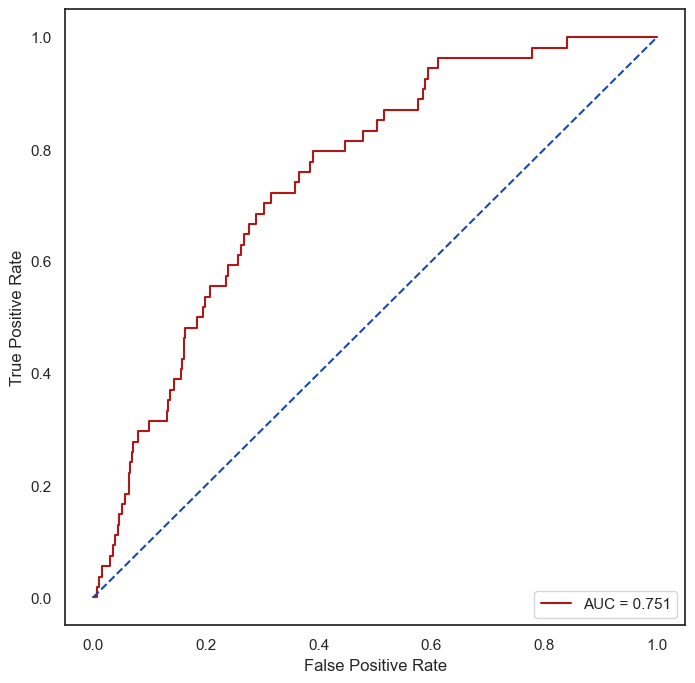

In [69]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Keras ANN <a id="12"></a>

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2

## Building the ANN <a id="12.1"></a>

In [ ]:
# Builing the function
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
# Passing values to KerasClassifier 
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

## Evaluating the ANN (Cross Validation) <a id="12.2"></a>

*Wrapping k-fold cross validation into keras model*

In [ ]:
# We are using 5 fold cross validation here
accuracies = cross_val_score(estimator = ann, X = x_train_res, y = y_train_res, cv = 5)

Epoch 1/50
195/195 [==============================] - 1s 1ms/step - loss: 0.7935 - accuracy: 0.6625
Epoch 2/50
195/195 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7917
Epoch 3/50
195/195 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.8147
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.8242
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.8359
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8335
Epoch 7/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.8300
Epoch 8/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8407
Epoch 9/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8466
Epoch 10/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8344

In [ ]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean*100))
print("Standard Deviation: {:.2f} %".format(std_deviation*100))

Accuracy: 76.96 %
Standard Deviation: 5.40 %


## Tuning the ANN <a id="12.3"></a>

*We use the Grid Search method for this task*

In [ ]:
# Builing the function
def ann_classifier(optimizer = 'adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
# Passing values to KerasClassifier 
ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

In [ ]:
# Using Grid Search CV to getting the best parameters
parameters = {'batch_size': [25, 32],
             'epochs': [50, 100, 150],
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = ann, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)

grid_search.fit(x_train_res, y_train_res)

Epoch 1/150
312/312 [==============================] - 1s 1ms/step - loss: 0.7979 - accuracy: 0.6154
Epoch 2/150
312/312 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7739
Epoch 3/150
312/312 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7963
Epoch 4/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.8034
Epoch 5/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.8103
Epoch 6/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8105
Epoch 7/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8182
Epoch 8/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8178
Epoch 9/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8163
Epoch 10/150
312/312 [==============================] - 0s 1ms/step - loss: 0.4426 - accura

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f541524d4d0>,
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [50, 100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.29 %
Best Parameters: {'batch_size': 25, 'epochs': 150, 'optimizer': 'rmsprop'}


## ANN Model after Tuning <a id="12.4"></a>

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann_history = ann.fit(x_train_res, y_train_res, batch_size= 25, epochs= 150, validation_split= 0.2)

Epoch 1/150
250/250 [==============================] - 2s 4ms/step - loss: 1.0016 - accuracy: 0.6722 - val_loss: 0.7146 - val_accuracy: 0.7593
Epoch 2/150
250/250 [==============================] - 1s 2ms/step - loss: 0.5788 - accuracy: 0.7973 - val_loss: 0.6940 - val_accuracy: 0.7478
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7987 - val_loss: 0.5559 - val_accuracy: 0.8068
Epoch 4/150
250/250 [==============================] - 1s 2ms/step - loss: 0.4789 - accuracy: 0.8029 - val_loss: 0.5947 - val_accuracy: 0.7824
Epoch 5/150
250/250 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.8176 - val_loss: 0.6864 - val_accuracy: 0.6855
Epoch 6/150
250/250 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8225 - val_loss: 0.5319 - val_accuracy: 0.8113
Epoch 7/150
250/250 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.8133 - val_loss: 0.5364 - val_accuracy: 0.8100

### Loss Graph <a id="12.4.1"></a>

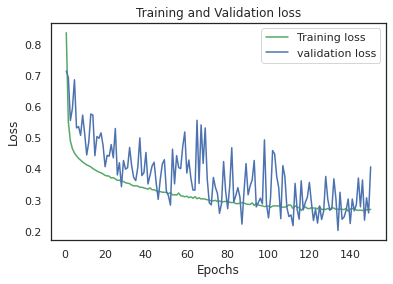

In [ ]:
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy Graph <a id="12.4.2"></a>

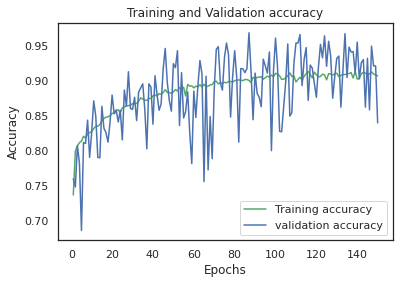

In [ ]:
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion Matrix:
 [[897  71]
 [ 45   9]]
Accuracy:  0.8864970645792564


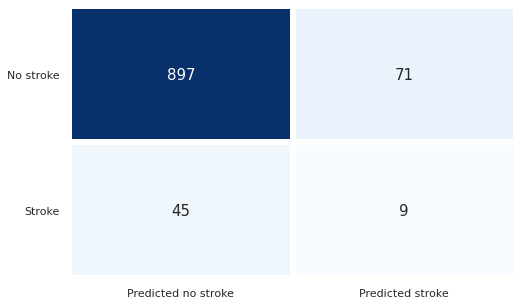

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)

# Calculate the Accuracy
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy: ',accuracy)

#Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Conclusion <a id="13"></a>

Therefore, after the multiple visualizations of our and going through all the performance of the models. I tune the hyperparameters with the help of GridSearch to get models. After that, I came to conclusion that ***RandomForestClassifier*** is best model for this dataset.

### Thank You!